In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [8]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding = 'utf-8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

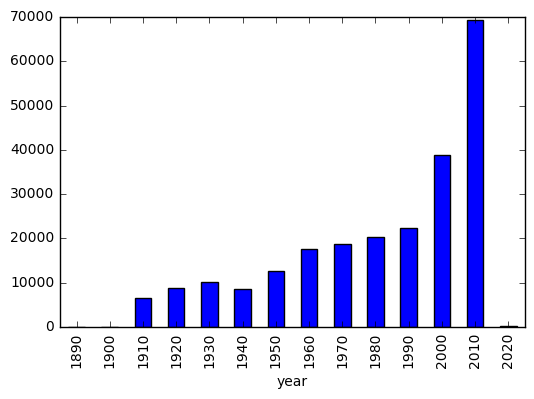

In [86]:
titles.groupby(titles.year // 10 * 10).size().plot(kind = 'bar')

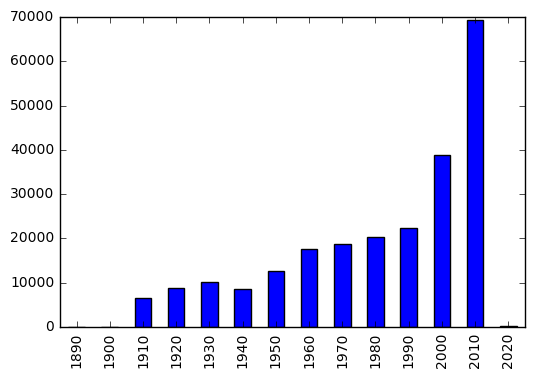

In [89]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

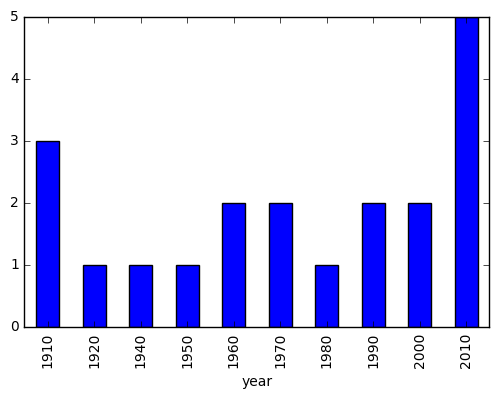

In [91]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).size().plot(kind = 'bar')

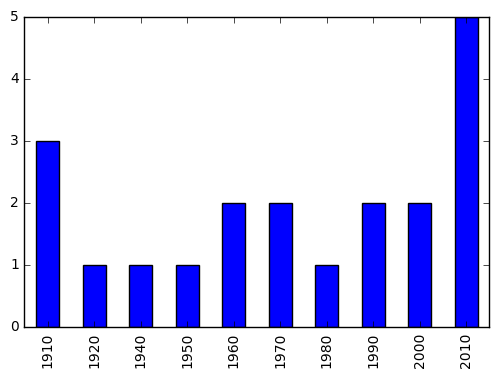

In [93]:
(titles[titles.title == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [94]:
cast[cast.n == 1].groupby('type').size()

type
actor      102443
actress     45738
dtype: int64

In [96]:
cast[cast.n == 1].type.value_counts()

actor      102443
actress     45738
Name: type, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [102]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n >= 1) & (cast.n<=5)].groupby(['type','n']).size()

type     n  
actor    1.0    6620
         2.0    4574
         3.0    5597
         4.0    5600
         5.0    5622
actress  1.0    2972
         2.0    4564
         3.0    3153
         4.0    2853
         5.0    2546
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [112]:
cast[cast.title.str.contains('Pink Panther')].title.value_counts()

The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
Trail of the Pink Panther          41
The Return of the Pink Panther     30
Name: title, dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [132]:
c = cast[cast.name == 'Frank Oz'].groupby('title').size()
c[c>1]

title
An American Werewolf in London          2
Follow That Bird                        3
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
The Dark Crystal                        2
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppet Movie                        8
The Muppets Take Manhattan              7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [146]:
c = cast[cast.name == 'Frank Oz'].groupby('character').size()
c[c>1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64